In [ ]:
# 3/20 check point 구현 
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install tensorflow==1.15
!pip install keras==2.2.4
!pip install keras_tqdm

In [ ]:
#!pip install tensorflow==1.15.0
import tensorflow as tf
import keras
print(tf.__version__) # 1,15,0
print(keras.__version__) # 2.2.4

1.15.0
2.2.4


Using TensorFlow backend.


In [ ]:
import numpy as np

from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
import tensorflow as tf

from PIL import Image
import cv2

 # Build U-Net model
IMG_HEIGHT = 512
IMG_WIDTH = 256
IMG_CHANNELS = 3
def u_net() :
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255) (inputs)

    c1 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (inputs)
    c1 = BatchNormalization()(c1)
    c1 = Dropout(0.1) (c1)
    c1 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
    c1 = BatchNormalization()(c1)
    p1 = MaxPooling2D((2, 2)) (c1)

    c2 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
    c2 = BatchNormalization()(c2)
    c2 = Dropout(0.1) (c2)
    c2 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
    c2 = BatchNormalization()(c2)
    p2 = MaxPooling2D((2, 2)) (c2)

    c3 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
    c3 = BatchNormalization()(c3)
    c3 = Dropout(0.2) (c3)
    c3 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
    c3 = BatchNormalization()(c3)
    p3 = MaxPooling2D((2, 2)) (c3)

    c4 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
    c4 = BatchNormalization()(c4)
    c4 = Dropout(0.2) (c4)
    c4 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
    c4 = BatchNormalization()(c4)
    p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

    c5 = Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
    c5 = BatchNormalization()(c5)
    c5 = Dropout(0.3) (c5)
    c5 = Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)
    c5 = BatchNormalization()(c5)

    u6 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same') (c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
    c6 = BatchNormalization()(c6)
    c6 = Dropout(0.2) (c6)
    c6 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)
    c6 = BatchNormalization()(c6)

    u7 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
    c7 = BatchNormalization()(c7)
    c7 = Dropout(0.2) (c7)
    c7 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)
    c7 = BatchNormalization()(c7)

    u8 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
    c8 = BatchNormalization()(c8)
    c8 = Dropout(0.1) (c8)
    c8 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)
    c8 = BatchNormalization()(c8)

    u9 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
    c9 = BatchNormalization()(c9)
    c9 = Dropout(0.1) (c9)
    c9 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)
    c9 = BatchNormalization()(c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# test_img폴더명 적기

def testImg_preprocessing(TEST_PATH_IMG) :
    img = TEST_PATH_IMG
    img = cv2.imread(img)
    img = cv2.resize(img,(IMG_WIDTH,IMG_HEIGHT))
    X_test = np.expand_dims(img, axis=0)
    return X_test


if __name__ == '__main__':
    model = u_net()

    TEST_PATH_IMG = '/content/drive/My Drive/Colab Notebooks/webtoon_data/u-net-data_4-16/test_images/2.jpg'
    X_test = testImg_preprocessing(TEST_PATH_IMG)

    model.load_weights('/content/drive/My Drive/Colab Notebooks/webtoon_data/u-net-data_4-16/model_checkPoint/548--0.9618.h5') 
    predict_img = model.predict(X_test, verbose = 1) #(1,512,256,1)
    
    #predict_img_t = np.squeeze(predict_img)
    #save_path = '/content/drive/My Drive/Colab Notebooks/webtoon_data/u-net-data_4-16/predict_images/'
    #cv2.imwrite(save_path+'test3-5.jpg',predict_img)


1/1 [==============================] - 0s 380ms/step


(1, 512, 256, 1)
(512, 256)


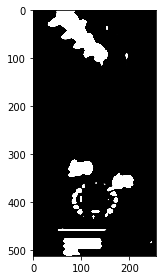

In [ ]:
from skimage.io import imread, imshow, imread_collection, concatenate_images, imsave
from skimage.transform import resize
from skimage.morphology import label
import matplotlib.pyplot as plt

print(predict_img.shape)
predict_img_t = np.squeeze(predict_img) # 차원축소
print(predict_img_t.shape)
imshow((predict_img_t))
plt.show()

(512, 256)


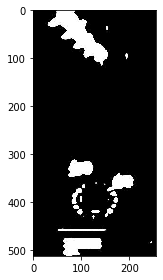

In [ ]:
save_path = '/content/drive/My Drive/Colab Notebooks/webtoon_data/u-net-data_4-16/predict_images/'
imsave(save_path+'test-sk.jpg',predict_img_t)
img = imread(save_path+'test-sk.jpg')
print(img.shape)
imshow(img)
plt.show()

In [ ]:
import cv2
print(predict_img.shape) #(1,512,256,1)
predict_img_t = np.squeeze(predict_img) # 차원축소
print(predict_img_t.shape) #(512,256)
from google.colab.patches import cv2_imshow
cv2_imshow(predict_img_t*255)  # skimage 와 다르게 255를 곱해줘야함
print((predict_img_t*255).shape)  # (512,256)

In [ ]:
import cv2
cv2.imwrite(save_path+'test-cv2.jpg',predict_img_t)
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/webtoon_data/u-net-data_4-16/predict_images/test3-5.jpg')
print(img.shape)
#cv2.resize()
from google.colab.patches import cv2_imshow
cv2_imshow(img*255)

In [ ]:
import numpy as np
img = np.array(img)
print(img)